Weights: [0.1, 0.0, 0.1]
Bias: -0.1
Input: [0, 0, 0], Output: 0, Target: 0
Input: [0, 1, 0], Output: 0, Target: 0
Input: [1, 0, 0], Output: 0, Target: 0
Input: [1, 1, 1], Output: 1, Target: 1


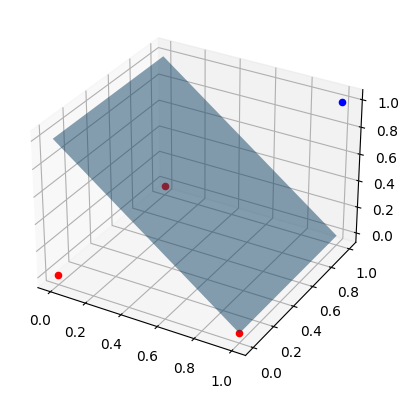

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Activation function
def activation_function(x):
  if x > 0:
    return 1
  else:
    return 0

# AND gate truth table
truth_table = [[0, 0, 0, 0],
               [0, 1, 0, 0],
               [1, 0, 0, 0],
               [1, 1, 1, 1]]

# Initialize weights and bias
weights = [0.0, 0.0, 0.0]
bias = 0.0

# Set the learning rate
learning_rate = 0.1

# Iterate until convergence
converged = False
while not converged:
  converged = True
  for i in range(len(truth_table)):
    x = truth_table[i][:3]
    y = truth_table[i][3]

    # Calculate the output of the perceptron
    output = activation_function(weights[0] * x[0] + weights[1] * x[1] + weights[2] * x[2] + bias)

    # Update the weights and bias if the output is not correct
    if y != output:
      weights[0] += learning_rate * (y - output) * x[0]
      weights[1] += learning_rate * (y - output) * x[1]
      weights[2] += learning_rate * (y - output) * x[2]
      bias += learning_rate * (y - output)
      converged = False

# Print the final weights and bias
print("Weights:", weights)
print("Bias:", bias)

# Test the perceptron with the truth table
for i in range(len(truth_table)):
  x = truth_table[i][:3]
  y = truth_table[i][3]

  output = activation_function(weights[0] * x[0] + weights[1] * x[1] + weights[2] * x[2] + bias)
  print(f"Input: {x}, Output: {output}, Target: {y}")

# Plot the data and the decision boundary
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(truth_table)):
  x = truth_table[i][:3]
  y = truth_table[i][3]
  if y == 0:
    ax.scatter(x[0], x[1], x[2], c='r')
  else:
    ax.scatter(x[0], x[1], x[2], c='b')

# Calculate the decision boundary
x1 = np.linspace(0, 1, 2)
x2 = np.linspace(0, 1, 2)
x1, x2 = np.meshgrid(x1, x2)
y = -(weights[0] / weights[2]) * x1 - (weights[1] / weights[2]) * x2 - (bias / weights[2])

ax.plot_surface(x1, x2, y, alpha=0.5)

plt.show()